<a href="https://colab.research.google.com/github/Udaykamal2005/OIBSIP/blob/main/Project_1_Proposal_Level_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 0: Setup, imports, upload your dataset
# Run this first. When prompted, upload your Housing.csv (or the file you have).

from google.colab import files
uploaded = files.upload()   # use the Colab file upload UI to upload your CSV

import io, os, sys, datetime
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

print("Uploaded files:", list(uploaded.keys()))

# Heuristic to find the CSV file user uploaded (choose first .csv)
csv_files = [fname for fname in uploaded.keys() if fname.lower().endswith('.csv')]
if len(csv_files) == 0:
    raise FileNotFoundError("No CSV uploaded. Please upload your housing CSV file (e.g., Housing.csv).")
datafile = csv_files[0]
print("Using data file:", datafile)

# Show a quick preview
df = pd.read_csv(io.BytesIO(uploaded[datafile]))
display(df.head())
print("Rows, columns:", df.shape)


Saving Housing.csv to Housing.csv
Uploaded files: ['Housing.csv']
Using data file: Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Rows, columns: (545, 13)


In [ ]:
# Cell 1: Quick exploratory data analysis
display(df.info())
display(df.describe(include='all').transpose())

# Missing values summary
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing>0])

# If there are many unique categories, show top categories for object columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColumn '{col}' - top values:")
    display(df[col].value_counts().head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,545.0,NaN,NaN,NaN,4766729.247706,1870439.615657,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,NaN,NaN,NaN,5150.541284,2170.141023,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,NaN,NaN,NaN,2.965138,0.738064,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,NaN,NaN,NaN,1.286239,0.50247,1.0,1.0,1.0,2.0,4.0
stories,545.0,NaN,NaN,NaN,1.805505,0.867492,1.0,1.0,2.0,2.0,4.0
mainroad,545,2,yes,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guestroom,545,2,no,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basement,545,2,no,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotwaterheating,545,2,no,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioning,545,2,no,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0



Column 'mainroad' - top values:


,count
mainroad,
yes,468
no,77



Column 'guestroom' - top values:


,count
guestroom,
no,448
yes,97



Column 'basement' - top values:


,count
basement,
no,354
yes,191



Column 'hotwaterheating' - top values:


,count
hotwaterheating,
no,520
yes,25



Column 'airconditioning' - top values:


,count
airconditioning,
no,373
yes,172



Column 'prefarea' - top values:


,count
prefarea,
no,417
yes,128



Column 'furnishingstatus' - top values:


,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [ ]:
# Cell 2: Choose target column automatically if possible
# Common target names: 'SalePrice', 'saleprice', 'price', 'Price', 'target'
possible_targets = [c for c in df.columns if c.lower() in ('saleprice','price','target','price_usd','median_house_value','median_house_value')]
if len(possible_targets)==0:
    # Ask: choose last numeric column as fallback
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols)==0:
        raise ValueError("No numeric columns found. Please check dataset and pick a numeric target.")
    target = numeric_cols[-1]
    print("No standard target found; using last numeric column as target:", target)
else:
    target = possible_targets[0]
    print("Detected target column:", target)

# Basic cleaning: drop exact duplicates
df = df.drop_duplicates().reset_index(drop=True)
print("After dropping duplicates, shape:", df.shape)

# Show target distribution
display(df[target].describe())


Detected target column: price
After dropping duplicates, shape: (545, 13)


,price
count,5.450000e+02
mean,4.766729e+06
std,1.870440e+06
min,1.750000e+06
25%,3.430000e+06
50%,4.340000e+06
75%,5.740000e+06
max,1.330000e+07


In [ ]:
# Cell 3: Simple missing value handling
# Strategy:
# - Numeric: fill with median
# - Categorical: fill with 'missing'
from sklearn.model_selection import train_test_split

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if target in num_cols:
    num_cols.remove(target)

print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)

# Fill
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna('missing')

# Verify no missing remain
print("Missing values after fill:", df.isna().sum().sum())


Numeric features: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical features: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Missing values after fill: 0


In [ ]:
# Cell 4: Basic feature engineering examples
# - Convert date columns to datetime and extract year/month if present
for col in df.columns:
    if 'date' in col.lower() or 'year' in col.lower() and df[col].dtype == object:
        try:
            df[col] = pd.to_datetime(df[col])
            df[f"{col}_year"] = df[col].dt.year
            df[f"{col}_month"] = df[col].dt.month
            print("Converted date column:", col)
        except Exception:
            pass

# If there are latitude/longitude, you might compute simple features (distance from center) - skip unless found
# Print new shape
print("Shape after FE:", df.shape)
display(df.head())


Shape after FE: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Cell 5: Prepare X (features) and y (target). Drop ID-like columns.
import re

# Drop obvious non-feature columns (IDs)
drop_like = [c for c in df.columns if re.search(r'id$', c.lower()) or c.lower()=='id']
X = df.drop(columns = drop_like + [target])
y = df[target].copy()

# For safety, drop original date columns (we kept derived year/month)
date_cols = [c for c in X.columns if pd.api.types.is_datetime64_any_dtype(X[c])]
if date_cols:
    X = X.drop(columns=date_cols)

print("Final feature count:", X.shape[1])
print("Train/test split (80/20)")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
print("Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Final feature count: 12
Train/test split (80/20)
Shapes: (436, 12) (109, 12) (436,) (109,)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object','category','bool']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features (will be one-hot):", categorical_features)

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='drop')

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit baseline model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Baseline LinearRegression results:\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nR2: {r2:.4f}")

Numeric features: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical features (will be one-hot): ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Baseline LinearRegression results:
RMSE: 1324506.9601
MAE: 970043.4039
R2: 0.6529


In [ ]:
# Cell 7: Cross-val and hyperparameter search for Ridge and Lasso
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score

# Wrap a pipeline for each model to search alpha
def grid_search_for(model_class, param_grid, name):
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('reg', model_class())])
    gs = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    print(f"\n{name} best params: {gs.best_params_}, best score (neg RMSE): {gs.best_score_}")
    return gs

ridge_params = {'reg__alpha':[0.1,1.0,10.0,50.0,100.0]}
lasso_params = {'reg__alpha':[0.0001,0.001,0.01,0.1,1.0]}

gs_ridge = grid_search_for(Ridge, ridge_params, "Ridge")
gs_lasso = grid_search_for(Lasso, lasso_params, "Lasso")

# Evaluate best models on test set
for name, gs in [('Ridge', gs_ridge), ('Lasso', gs_lasso)]:
    y_pred = gs.predict(X_test)
    print(f"\n{name} test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}, R2: {r2_score(y_test, y_pred):.4f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits

Ridge best params: {'reg__alpha': 10.0}, best score (neg RMSE): -1019284.5963199368
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Lasso best params: {'reg__alpha': 1.0}, best score (neg RMSE): -1021776.3075674966

Ridge test RMSE: 1333155.2845, R2: 0.6484

Lasso test RMSE: 1324508.6227, R2: 0.6529


In [ ]:
# Cell 8: Extract feature names after preprocessing and show coefficients for best Ridge
best = gs_ridge.best_estimator_  # pipeline
# get preprocessor output feature names
ohe = best.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_cols_after = []
if hasattr(ohe, 'get_feature_names_out'):
    cat_cols_after = list(ohe.get_feature_names_out(categorical_features))
else:
    # fallback
    for c in categorical_features:
        cat_cols_after += [f"{c}_{v}" for v in df[c].unique()[:10]]  # approximate

feature_names = numeric_features + cat_cols_after
coefs = best.named_steps['reg'].coef_
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})
coef_df = coef_df.reindex(coef_df.coef.abs().sort_values(ascending=False).index)
display(coef_df.head(20))


,feature,coef
0,area,515102.835977
2,bathrooms,513781.374426
13,airconditioning_no,-374279.246278
14,airconditioning_yes,374279.246278
3,stories,347888.947000
15,prefarea_no,-298391.777946
16,prefarea_yes,298391.777946
11,hotwaterheating_no,-269881.924661
12,hotwaterheating_yes,269881.924661
19,furnishingstatus_unfurnished,-225048.319601


In [ ]:
# Cell 9: Predict on first 10 test rows and save results
sample_X = X_test.head(10).copy()
sample_preds = pd.DataFrame({
    'predicted_'+str(target): gs_ridge.predict(sample_X),
    'actual_'+str(target): y_test.head(10).values
})
display(sample_X.reset_index(drop=True))
display(sample_preds)

# Save cleaned dataset, predictions and model
out_cleaned = "housing_cleaned.csv"
df.to_csv(out_cleaned, index=False)
print("Saved cleaned dataset:", out_cleaned)

preds_all = pd.DataFrame({'actual': y_test, 'predicted': gs_ridge.predict(X_test)})
preds_all.to_csv("housing_test_predictions.csv", index=False)
print("Saved test predictions to housing_test_predictions.csv")


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished
1,6500,3,2,3,yes,no,no,no,yes,0,yes,furnished
2,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
3,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
4,3960,3,1,1,yes,no,no,no,no,0,no,furnished
5,6720,3,1,1,yes,no,no,no,no,0,no,unfurnished
6,8520,3,1,1,yes,no,no,no,yes,2,no,furnished
7,4990,4,2,2,yes,yes,yes,no,no,0,yes,furnished
8,3240,2,1,1,no,yes,no,no,no,1,no,unfurnished
9,2700,3,1,1,no,no,no,no,no,0,no,furnished


,predicted_price,actual_price
0,5.208550e+06,4060000
1,7.149190e+06,6650000
2,3.127265e+06,3710000
3,4.594872e+06,6440000
4,3.320384e+06,2800000
5,3.566876e+06,4900000
6,5.600871e+06,5250000
7,6.346940e+06,4543000
8,2.778496e+06,2450000
9,2.672564e+06,3353000


Saved cleaned dataset: housing_cleaned.csv
Saved test predictions to housing_test_predictions.csv


In [ ]:
# Cell 9: Predict on first 10 test rows and save results
sample_X = X_test.head(10).copy()
sample_preds = pd.DataFrame({
    'predicted_'+str(target): gs_ridge.predict(sample_X),
    'actual_'+str(target): y_test.head(10).values
})
display(sample_X.reset_index(drop=True))
display(sample_preds)

# Save cleaned dataset, predictions and model
out_cleaned = "housing_cleaned.csv"
df.to_csv(out_cleaned, index=False)
print("Saved cleaned dataset:", out_cleaned)

preds_all = pd.DataFrame({'actual': y_test, 'predicted': gs_ridge.predict(X_test)})
preds_all.to_csv("housing_test_predictions.csv", index=False)
print("Saved test predictions to housing_test_predictions.csv")


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished
1,6500,3,2,3,yes,no,no,no,yes,0,yes,furnished
2,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
3,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
4,3960,3,1,1,yes,no,no,no,no,0,no,furnished
5,6720,3,1,1,yes,no,no,no,no,0,no,unfurnished
6,8520,3,1,1,yes,no,no,no,yes,2,no,furnished
7,4990,4,2,2,yes,yes,yes,no,no,0,yes,furnished
8,3240,2,1,1,no,yes,no,no,no,1,no,unfurnished
9,2700,3,1,1,no,no,no,no,no,0,no,furnished


,predicted_price,actual_price
0,5.208550e+06,4060000
1,7.149190e+06,6650000
2,3.127265e+06,3710000
3,4.594872e+06,6440000
4,3.320384e+06,2800000
5,3.566876e+06,4900000
6,5.600871e+06,5250000
7,6.346940e+06,4543000
8,2.778496e+06,2450000
9,2.672564e+06,3353000


Saved cleaned dataset: housing_cleaned.csv
Saved test predictions to housing_test_predictions.csv


In [ ]:
# Cell 10: Save the pipeline model (best Ridge) as a pickle
import joblib
model_file = "housing_model_ridge.pkl"
joblib.dump(gs_ridge.best_estimator_, model_file)
print("Saved trained model pipeline to:", model_file)


Saved trained model pipeline to: housing_model_ridge.pkl


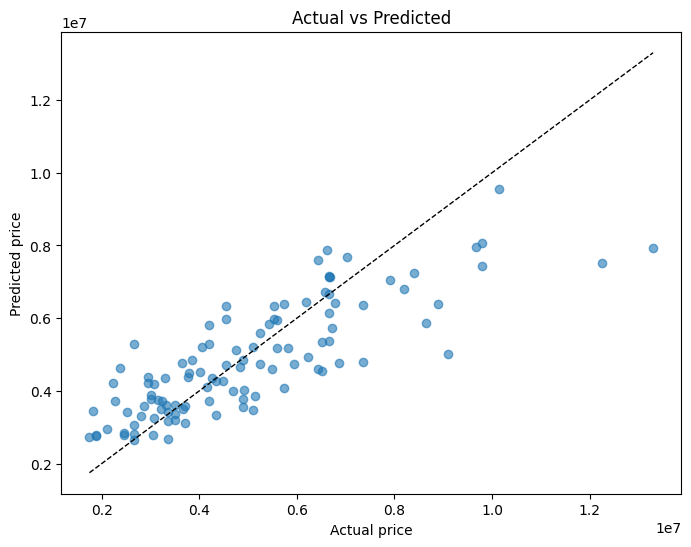

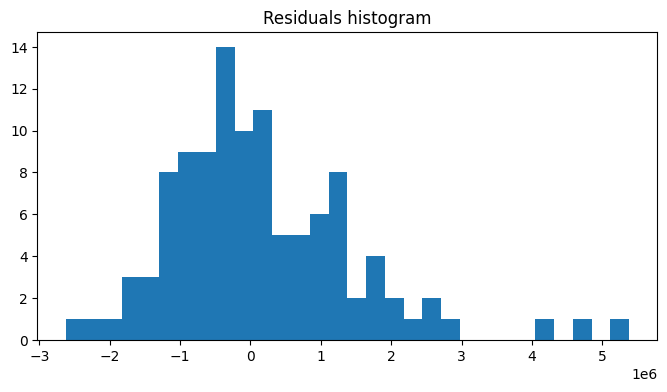

In [ ]:
# Cell 11: Visualization (matplotlib)
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_all = gs_ridge.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_all, alpha=0.6)
plt.xlabel("Actual "+str(target))
plt.ylabel("Predicted "+str(target))
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=1)
plt.show()

# Residual histogram
resid = y_test - y_pred_all
plt.figure(figsize=(8,4))
plt.hist(resid, bins=30)
plt.title("Residuals histogram")
plt.show()
